<a href="https://colab.research.google.com/github/nullstead/cv-test/blob/main/2veggies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Jun 17 08:58:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [22]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rkI0UqLLPH0yVsl0y4Af")
project = rf.workspace("yolo-0uujr").project("two-ingredients-test")
version = project.version(2)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Two-Ingredients-Test-2 in yolov8:: 100%|██████████| 36/36 [00:00<00:00, 7818.31it/s]


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.7/780.7 kB 15.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
from ultralytics import YOLO

In [21]:
!rm -r /content/runs

In [23]:
!yolo detect train data=/content/Two-Ingredients-Test-2/data.yaml model=yolov8m.pt epochs=100 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 522MB/s]
Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Two-Ingredients-Test-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

In [24]:
!yolo detect val model=/content/runs/detect/train/weights/best.pt data=/content/Two-Ingredients-Test-2/data.yaml

Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Two-Ingredients-Test-2/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100% 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.16it/s]
                   all          3          4      0.973      0.833      0.901      0.663
                 onion          1          1      0.962          1      0.995      0.895
                tomato          2          3      0.984      0.667      0.806      0.431
Speed: 0.3ms preprocess, 39.1ms inference, 0.0ms loss, 205.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [25]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/Two-Ingredients-Test-2/test/images

Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/2 /content/Two-Ingredients-Test-2/test/images/onion6_jpeg.rf.d4bd0ea65f27933f50d6f182015fecbd.jpg: 448x640 3 onions, 120.0ms
image 2/2 /content/Two-Ingredients-Test-2/test/images/tom5_jpeg.rf.6c0ea794c8140e6d83e346682767b1e1.jpg: 448x640 3 tomatos, 27.3ms
Speed: 3.0ms preprocess, 73.7ms inference, 417.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


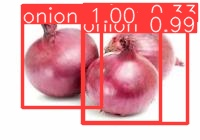

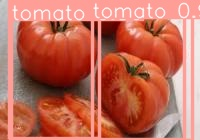

In [26]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")

In [27]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f'/content/runs/detect/train/')

Dependency ultralytics==8.0.196 is required but found version=8.2.34, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/yolo-0uujr/two-ingredients-test/2
Share your model with the world at: https://universe.roboflow.com/yolo-0uujr/two-ingredients-test/model/2
